# Задача 2_1
Пусть задано две вектора ответов: y — истинный вектор ответов для некоторой выборки, а также есть вектор ответов $\hat{y}$ --- некоторой предсказательной модели. Наблюдатель хочет проверить гипотезу о том, что ровно в $25\%$ случаев модель дает заниженные оценки. 
Предложите метод проверки данной гипотезы: запишите задачу формально, 
предложите статистику для решения данной задачи на уровне значимости alpha = 0.05.
Также найдите зависимость мощности данного критерия в зависимости от истинного
процента заниженных ответов.

### Формальная запись задачи:

+ Выборки: $$\hat{y} = (\hat{y_1},\ldots, \hat{y_n})$$
$$y = (y_1,\ldots, y_n)$$
+ Выборки связанные, cделаем предположение, что $\forall i \in \overline{1,n}$ выполняется $y_i \neq \hat{y_i}$. Если это не выполняется, исключаем 

+ Нулевая гипотеза $H_0$: $$\mathsf{P}(\hat{y} > y) = \dfrac{1}{4}$$
+ Альтернатива $H_1$: $$\mathsf{P}(\hat{y} > y) \neq \dfrac{1}{4}$$
+ Нулевое распределение: $$Bin(n,\  \dfrac{1}{4})$$
+ Применяем двухвыборочный критерий знаков. Статистика: $$T(\hat{y}, y) = \sum_{i=1}^n \left[ \hat{y_i} > y \right] \sim  Bin(n , \frac{1}{4})  \text{ при Н}_0$$
+ Достигаемый уровень значимости: 
$$p(x)=  binocdf(x,n, 0.25)$$

Исследуем мощность критерия в зависимости от истинного процента заниженных ответов. Если отклонили $H_0$ - мощность 1, иначе 0. Размер выборки берем 100.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import binom_test
text_size = 14
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['lines.markersize'] = 6
plt.rcParams['xtick.labelsize'] = text_size
plt.rcParams['ytick.labelsize'] = text_size
plt.rcParams['legend.fontsize'] = text_size
plt.rcParams['axes.titlesize'] = text_size
plt.rcParams['axes.labelsize'] = text_size
plt.rcParams['figure.figsize'] = (16.0, 8.0)
plt.rcParams['font.size'] = text_size

In [5]:
N = 100
power = [1 if binom_test(int(p), N, prop=0.25, alternative='two-sided')<= 0.05 
          else 0 for p in range(100)]

Text(0, 0.5, 'мощность')

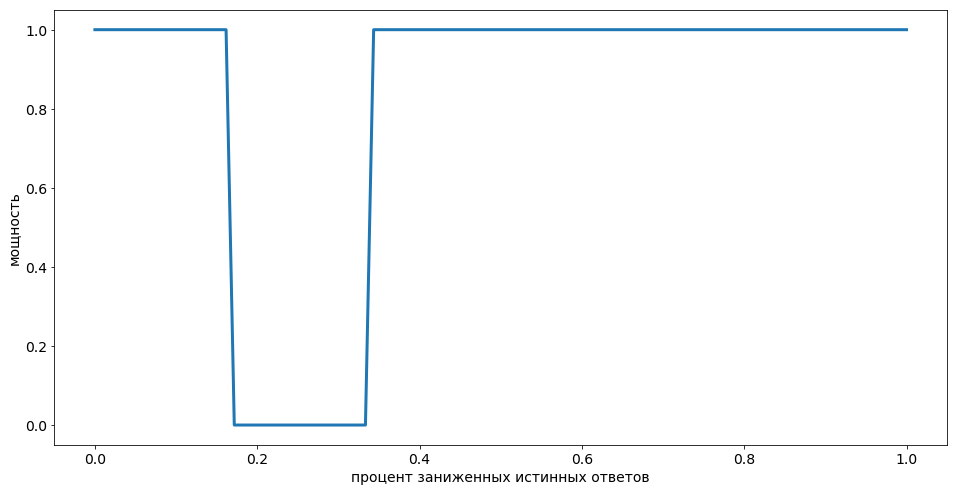

In [6]:
plt.plot(np.linspace(0, 1, 100), power)
plt.xlabel("процент заниженных истинных ответов")
plt.ylabel("мощность")

# Вывод:
Если процент истинных ответов заниженных ответов близок к 25%(\n), то критерий не отклоняет гипотезу.